## SMS Spam Classifier: Multinomial Naive Bayes

The notebook is divided into the following sections:
1. Importing and preprocessing data
2. Building the model: Multinomial Naive Bayes
    - Model building 
    - Model evaluation

### 1. Importing and Preprocessing Data

In [99]:
import pandas as pd

# reading the training data
docs = pd.read_csv('movie_review_train.csv', header=None, names=['class', 'text'])
docs.head()

,class,text
0,class,text
1,Pos,a common complaint amongst film critics is ...
2,Pos,whew this film oozes energy the kind of b...
3,Pos,steven spielberg s amistad which is bas...
4,Pos,he has spent his entire life in an awful litt...


In [100]:
docs.isnull().any()

class    False
text     False
dtype: bool

In [101]:
# number of SMSes / documents
len(docs)

1601

In [102]:
# counting spam and ham instances
pos_neg = docs['class'].value_counts()
pos_neg

Neg      800
Pos      800
class      1
Name: class, dtype: int64

In [103]:
#print("spam rate is about {0}%".format(
    #round((ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100), 2))

In [104]:
# mapping labels to 0 and 1
docs['label'] = docs['class'].map({'Neg':0, 'Pos':1})

In [105]:
docs.head()

,class,text,label
0,class,text,NaN
1,Pos,a common complaint amongst film critics is ...,1.0
2,Pos,whew this film oozes energy the kind of b...,1.0
3,Pos,steven spielberg s amistad which is bas...,1.0
4,Pos,he has spent his entire life in an awful litt...,1.0


In [106]:
# we can now drop the column 'Class'
docs = docs.drop('class', axis=1)
docs.head()

,text,label
0,text,NaN
1,a common complaint amongst film critics is ...,1.0
2,whew this film oozes energy the kind of b...,1.0
3,steven spielberg s amistad which is bas...,1.0
4,he has spent his entire life in an awful litt...,1.0


In [107]:
# convert to X and y
X = docs.text
y = docs.label
print(X.shape)
print(y.shape)

(1601,)
(1601,)


In [108]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [109]:
X_train.head()

12       with the success of the surprise hit alien   ...
854      hey   i ve got a great idea for a movie !  ok...
926      the high school comedy seems to be a hot genr...
73       in arguably the most anticipated movie this c...
1104     michael crichton has had a long career of wri...
Name: text, dtype: object

In [110]:


y_train.head()

12      1.0
854     0.0
926     0.0
73      1.0
1104    0.0
Name: label, dtype: float64

In [111]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',min_df=.03, max_df=.8)

In [112]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [113]:
# printing the vocabulary
vect.vocabulary_

{'success': 1377,
 'surprise': 1394,
 'hit': 673,
 'alien': 47,
 'directed': 370,
 'scott': 1224,
 'sequel': 1248,
 'fact': 487,
 'watching': 1554,
 'wanted': 1544,
 'particularly': 1013,
 'director': 374,
 'recent': 1149,
 'box': 151,
 'office': 979,
 'james': 745,
 'cameron': 186,
 'films': 539,
 'previous': 1086,
 'ii': 700,
 'surprisingly': 1397,
 'dull': 407,
 'making': 865,
 'series': 1251,
 'got': 619,
 'face': 484,
 'instead': 725,
 'suspense': 1400,
 'science': 1222,
 'fiction': 528,
 'action': 23,
 'picture': 1037,
 'results': 1172,
 'created': 300,
 'like': 821,
 'aliens': 48,
 'comes': 252,
 'does': 386,
 'audiences': 96,
 'usually': 1511,
 'saw': 1213,
 'movie': 931,
 'theaters': 1435,
 'wish': 1579,
 'likely': 823,
 'members': 895,
 'literally': 830,
 'fear': 515,
 'unlike': 1503,
 'seen': 1241,
 'plot': 1056,
 'gives': 609,
 'added': 33,
 'power': 1075,
 'original': 995,
 'makes': 864,
 'impressive': 711,
 'hero': 664,
 'case': 194,
 'sympathetic': 1402,
 'acting': 22,
 

In [114]:
len(vect.get_feature_names())

1618

In [125]:
# vocab size
len(vect.vocabulary_.keys())

1618

In [126]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [127]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [128]:
X_test_transformed

<401x1618 sparse matrix of type '<class 'numpy.int64'>'
	with 55428 stored elements in Compressed Sparse Row format>

In [129]:

print(X_test_transformed)

  (0, 25)	1
  (0, 26)	1
  (0, 31)	1
  (0, 32)	1
  (0, 34)	1
  (0, 59)	1
  (0, 65)	1
  (0, 70)	2
  (0, 76)	1
  (0, 91)	1
  (0, 95)	1
  (0, 101)	1
  (0, 109)	1
  (0, 120)	1
  (0, 121)	1
  (0, 131)	1
  (0, 141)	1
  (0, 168)	1
  (0, 173)	1
  (0, 190)	1
  (0, 194)	1
  (0, 196)	1
  (0, 199)	1
  (0, 203)	1
  (0, 213)	2
  :	:
  (400, 1092)	2
  (400, 1128)	1
  (400, 1142)	1
  (400, 1158)	1
  (400, 1177)	1
  (400, 1186)	1
  (400, 1211)	1
  (400, 1218)	1
  (400, 1219)	1
  (400, 1226)	1
  (400, 1246)	1
  (400, 1247)	1
  (400, 1255)	2
  (400, 1256)	1
  (400, 1309)	2
  (400, 1335)	1
  (400, 1405)	1
  (400, 1424)	1
  (400, 1428)	1
  (400, 1456)	1
  (400, 1483)	1
  (400, 1498)	1
  (400, 1506)	3
  (400, 1571)	1
  (400, 1608)	4


In [130]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 16)	1
  (0, 22)	2
  (0, 23)	9
  (0, 27)	1
  (0, 33)	1
  (0, 47)	11
  (0, 48)	20
  (0, 59)	1
  (0, 79)	1
  (0, 85)	2
  (0, 93)	1
  (0, 95)	1
  (0, 96)	2
  (0, 98)	2
  (0, 122)	1
  (0, 124)	1
  (0, 127)	3
  (0, 151)	1
  (0, 158)	1
  (0, 175)	1
  (0, 186)	8
  (0, 190)	1
  (0, 194)	1
  (0, 196)	1
  (0, 206)	1
  :	:
  (1199, 1056)	1
  (1199, 1061)	1
  (1199, 1070)	1
  (1199, 1080)	1
  (1199, 1086)	1
  (1199, 1090)	1
  (1199, 1103)	1
  (1199, 1137)	1
  (1199, 1141)	1
  (1199, 1156)	1
  (1199, 1213)	1
  (1199, 1219)	1
  (1199, 1220)	1
  (1199, 1226)	1
  (1199, 1344)	1
  (1199, 1350)	4
  (1199, 1356)	1
  (1199, 1397)	1
  (1199, 1445)	1
  (1199, 1486)	3
  (1199, 1490)	1
  (1199, 1543)	1
  (1199, 1570)	1
  (1199, 1586)	3
  (1199, 1591)	1


### 2. Building and Evaluating the Model

In [131]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [132]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

### Model Evaluation

In [133]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

NameError: name 'y_pred_class' is not defined

In [134]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

NameError: name 'y_pred_class' is not defined

In [135]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

NameError: name 'y_pred_class' is not defined

In [132]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.9459459459459459


In [133]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.9942052980132451


In [134]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.9615384615384616
0.9615384615384616


In [135]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [136]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0])

In [137]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [138]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [139]:
# area under the curve
print (roc_auc)

0.9921872203329157


In [140]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.308108,1.000000e+00
2,0.000000,0.313514,1.000000e+00
3,0.000000,0.335135,1.000000e+00
4,0.000000,0.340541,1.000000e+00
5,0.000000,0.351351,1.000000e+00
6,0.000000,0.367568,1.000000e+00
7,0.000000,0.400000,1.000000e+00
8,0.000000,0.410811,1.000000e+00
9,0.000000,0.594595,1.000000e+00


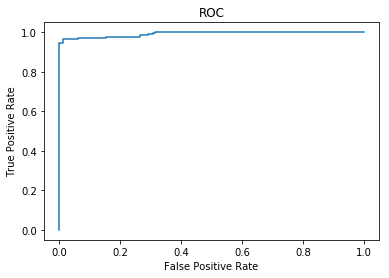

In [141]:
# plotting the ROC curve
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)